In [1]:
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
colors = list(mcolors.TABLEAU_COLORS.keys())*2
import os

full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark',
    'KE': 'Kenya', 
    'NG': 'Nigeria',
    'JP': 'Japan',
    'SE': 'Sweden',
    'ID': 'Indonesia',
    'EG': 'Egypt'
}

event_dicts = [{'country': 'AU',
  'end_md_1': '2020-06-07',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'BR',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-23',
  'start_md_2': np.nan},
 {'country': 'CA',
  'end_md_1': '2020-06-21',
  'start_md_1': '2020-03-19',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'end_md_1': '2020-05-09',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'end_md_1': '2020-05-07',
  'start_md_1': '2020-03-17',
  'start_md_2': np.nan},
 {'country': 'EG',
  'end_md_1': '2020-07-01',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'ES',
  'end_md_1': '2020-06-14',
  'start_md_1': '2020-03-17',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'end_md_1': '2020-06-08',
  'start_md_1': '2020-03-18',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'end_md_1': '2020-08-03',
  'start_md_1': '2020-03-23',
  'start_md_2': '2020-10-21'},
 {'country': 'ID',
  'end_md_1': '2020-08-10',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IN',
  'end_md_1': '2020-10-29',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IT',
  'end_md_1': '2020-06-06',
  'start_md_1': '2020-03-11',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'end_md_1': '2020-05-30',
  'start_md_1': '2020-04-12',
  'start_md_2': np.nan},
 {'country': 'KE',
  'end_md_1': '2020-10-04',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'MX',
  'end_md_1': '2020-10-06',
  'start_md_1': '2020-03-25',
  'start_md_2': np.nan},
 {'country': 'NG',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'SE',
  'end_md_1': '2020-04-09',
  'start_md_1': '2020-04-03',
  'start_md_2': np.nan},
 {'country': 'US',
  'end_md_1': '2020-06-11',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-11-26'}]
parentDirectory = os.path.abspath(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir),os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

In [2]:
df_events = pd.DataFrame(event_dicts)

In [3]:
df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [4]:
df_agg = pd.read_pickle(DATA_DIR+'df_agg_modes.pickle')

In [5]:
df_agg

,country,category,volume_weekly_total,volume_weekly_total_l,volume_weekly_total_h,volume_percent_weekly_total
0,FR,Mode 1,2019-01-06 2785.960793 2019-01-13 2773.5...,2019-01-06 2458.715557 2019-01-13 2448.5...,2019-01-06 3160.899878 2019-01-13 3145.9...,2019-01-06 0.659807 2019-01-13 0.642624 ...
1,FR,Mode 2,2019-01-06 3.640363 2019-01-13 3.91838...,2019-01-06 3.399005 2019-01-13 3.66225...,2019-01-06 3.920400 2019-01-13 4.19104...,2019-01-06 0.000862 2019-01-13 0.000908 ...
2,FR,Mode 3,2019-01-06 1422.335594 2019-01-13 1525.7...,2019-01-06 1257.986565 2019-01-13 1350.5...,2019-01-06 1610.285529 2019-01-13 1726.1...,2019-01-06 0.336856 2019-01-13 0.353518 ...
3,FR,Mode 4,2019-01-06 10.452691 2019-01-13 12.73262...,2019-01-06 8.503778 2019-01-13 10.65624...,2019-01-06 12.645970 2019-01-13 15.06377...,2019-01-06 0.002476 2019-01-13 0.002950 ...
4,DE,Mode 1,2019-01-06 639.344263 2019-01-13 624.6...,2019-01-06 577.355549 2019-01-13 563.9...,2019-01-06 708.781324 2019-01-13 692.6...,2019-01-06 0.563664 2019-01-13 0.549868 ...
...,...,...,...,...,...,...
67,SE,Mode 4,2019-01-06 4.060259 2019-01-13 4.976010 ...,2019-01-06 3.894145 2019-01-13 4.790504 ...,2019-01-06 4.233252 2019-01-13 5.169034 ...,2019-01-06 0.009104 2019-01-13 0.010827 ...
68,EG,Mode 1,2019-01-06 235.427690 2019-01-13 225.649...,2019-01-06 218.404858 2019-01-13 209.172...,2019-01-06 253.999847 2019-01-13 243.633...,2019-01-06 0.467154 2019-01-13 0.461574 ...
69,EG,Mode 2,2019-01-06 3.003663 2019-01-13 4.615385 ...,2019-01-06 2.852558 2019-01-13 4.421466 ...,2019-01-06 3.167055 2019-01-13 4.823370 ...,2019-01-06 0.005960 2019-01-13 0.009441 ...
70,EG,Mode 3,2019-01-06 259.522496 2019-01-13 253.989...,2019-01-06 237.865973 2019-01-13 232.807...,2019-01-06 283.422490 2019-01-13 277.401...,2019-01-06 0.514965 2019-01-13 0.519544 ...


In [6]:
weeks_2019 = list(df_agg.iloc[0]['volume_weekly_total'].index)[:52]
weeks_2020 = list(df_agg.iloc[0]['volume_weekly_total'].index)[52:]

In [7]:
l = []
for cnt, row in df_agg.iterrows():
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_weekly_total'].index,row['volume_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

In [8]:
df = pd.DataFrame(l)

In [9]:
k = 30

In [10]:
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)].copy()

In [11]:
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

In [12]:
df

,country,category,k,volume_total,volume_percent,year,intervention_flag
0,FR,Mode 1,-10,2785.960793,0.659807,2019,0
1,FR,Mode 1,-9,2773.587295,0.642624,2019,0
2,FR,Mode 1,-8,2769.001158,0.636911,2019,0
3,FR,Mode 1,-7,2813.607733,0.637242,2019,0
4,FR,Mode 1,-6,2637.246233,0.590838,2019,0
...,...,...,...,...,...,...,...
7057,EG,Mode 4,26,3.003663,0.007159,2020,1
7058,EG,Mode 4,27,5.494505,0.012863,2020,1
7059,EG,Mode 4,28,4.468864,0.010329,2020,1
7060,EG,Mode 4,29,4.615385,0.011850,2020,1


In [13]:
def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_percent ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_percent ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_percent ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_percent ~ intervention_flag*year"
    return eq
    

In [14]:
def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_percent ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_percent ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_percent ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_percent ~ intervention_flag*year*C(country)*C(category)"
    return eq
    

In [15]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_percent'] = df_temp['volume_percent'].apply(lambda x: np.log(x + 0.0001))

mod = smf.ols(generate_equation_interactions('Quadratic'), data = df_temp)

result_interactions = mod.fit(cov_type='hc0')

In [16]:
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

In [17]:
cats = ['Mode 1','Mode 2','Mode 3','Mode 4']

In [18]:
default_country = 'AU'
default_category = 'Mode 1'

alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

list_results = []



for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            
            total_gamma = (result_interactions.params[gamma_baseline])
            total_gamma_error = (result_interactions.bse[gamma_baseline])
            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category]))

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline,
                                                         gamma_baseline + suffix_country]))

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) \
                    + (result_interactions.params[gamma_baseline + suffix_country + suffix_category])
            
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category,
                                                         gamma_baseline + suffix_country, 
                                                         gamma_baseline + suffix_country + suffix_category]))
            
        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error
        entry['gamma'] = total_gamma
        entry['gamma_ste'] = total_gamma_error
        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)

In [19]:
countries_sorted = list(df_results.loc[df_results['category'] == 'Mode 1'].\
                        sort_values(by = 'alpha', ascending = False)['country'].values)

In [20]:
cats_sorted = list(df_results.groupby('category')['alpha'].agg('mean').sort_values(ascending = False).index)
#countries_sorted = list(df_results.groupby('country')['alpha'].\
#     agg('mean').sort_values(ascending = False).index)

In [21]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

In [22]:
dict_annotate = {'Mode 1': 'Recipe, cooking, baking, grocery\n store, supermarket',
                 'Mode 2': 'Food delivery, take-out,\n drive-in', 
                 'Mode 3': 'Restaurant, careteria, cafe,\n diner, food festival', 
                 'Mode 4': 'Picnic, barbecue, \nlunchbox'}

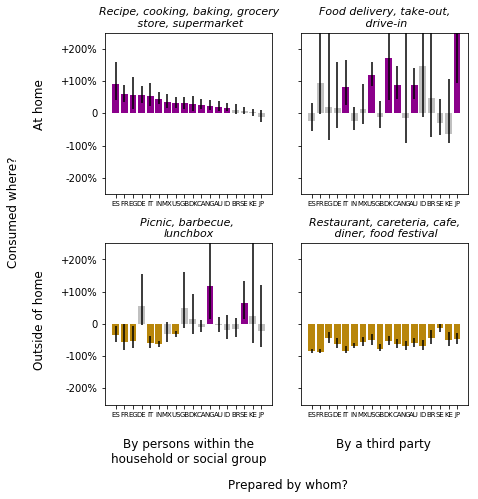

In [23]:
fig, axes = plt.subplots(2,2, figsize = (6,6), sharey = True)

for cnt,c in enumerate(['Mode 1','Mode 2','Mode 4','Mode 3']):
    sbplt = axes[math.floor(cnt/2), cnt%2]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(18):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('silver')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    
    sbplt.bar(range(18),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    sbplt.set_xticks(range(18))
    sbplt.set_xticklabels(x['country'], fontsize= 7)
    sbplt.set_title(dict_annotate[c], size= 11, style='italic')
    
    sbplt.set_yticks([-2,-1,0,1,2])
    sbplt.set_yticklabels(["-200%","-100%","0","+100%","+200%"])
    sbplt.set_ylim([-2.5,2.5])

#fig.suptitle("α", position = (0.5, 1.05))

size_l = 12
fig.text(0.55, -0.14, 'Prepared by whom?', ha='center', fontsize= size_l)
fig.text(0.32, -0.08, 'By persons within the\nhousehold or social group', ha='center', fontsize= size_l)
fig.text(0.77, -0.08, 'By a third party\n', ha='center', fontsize= size_l)

fig.text(-0.1, 0.5, 'Consumed where?', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.25, 'Outside of home', va='center', rotation='vertical', fontsize= size_l)
fig.text(-0.04, 0.75, 'At home', va='center', rotation='vertical', fontsize= size_l)
plt.tight_layout()

plt.savefig(FIGURES_DIR+"appendix_fraction_modes.pdf", bbox_inches='tight')